In [25]:
import pickle 
import pandas as pd
import clustereval as ce
import numpy as np
import glob
import re
import plotnine as pn

In [2]:
p=re.compile('perturb_out/|-exp_alg|_res|_knn|_.csv')
def read_metric_out(file):
    raw_exp = file.split('/')[1].split('.c')[0]
    exp_params = [raw_exp] + re.sub(p, '', file).split('-')
    outdf = pd.read_csv(file, names = ['cluster_id','stability', 'purity'])
    outdf[['raw_exp', 'dataset', 'alg', 'res', 'knn']] = exp_params
    return outdf


out_files = glob.glob('perturb_out/*_.csv')
metric_dfs = [read_metric_out(i) for i in out_files]
all_metric_results = pd.concat(metric_dfs)
all_metric_results.loc[all_metric_results.stability.isnull(), 'stability' ] =0

In [4]:
all_metric_results.groupby(['dataset', 'alg']).stability.describe()

count      mean       std       min       25%  \
dataset        alg                                                        
pbmc           leiden    1538.0  0.138654  0.229567 -0.024720  0.006081   
               louvain   1586.0  0.126630  0.199748 -0.013361  0.006536   
sanes_amacrine leiden   11128.0  0.081601  0.146554 -0.171764  0.006869   
               louvain  11242.0  0.071861  0.126460 -0.118197  0.005838   

                             50%       75%       max  
dataset        alg                                    
pbmc           leiden   0.024300  0.121541  0.986573  
               louvain  0.035413  0.138141  0.982891  
sanes_amacrine leiden   0.022536  0.069488  0.974957  
               louvain  0.021762  0.061531  0.973506

In [6]:
all_metric_results.groupby(['dataset', 'alg']).purity.describe()

count      mean       std       min       25%  \
dataset        alg                                                        
pbmc           leiden    1538.0  0.357000  0.201844  0.040337  0.214426   
               louvain   1586.0  0.343979  0.181937  0.048664  0.209247   
sanes_amacrine leiden   11128.0  0.107695  0.151595  0.003773  0.030039   
               louvain  11242.0  0.092057  0.124490  0.003799  0.028371   

                             50%       75%       max  
dataset        alg                                    
pbmc           leiden   0.292982  0.454186  0.929037  
               louvain  0.294063  0.451954  0.885600  
sanes_amacrine leiden   0.043650  0.082352  0.758413  
               louvain  0.041156  0.074281  0.662192

From this, feel like the current permutation procedure might be a little too heavy

In [8]:
pbmc_metrics = all_metric_results.query('dataset == "pbmc"')

In [9]:
pbmc_metrics.sort_values('stability').head(10)

,cluster_id,stability,purity,raw_exp,dataset,alg,res,knn
3,1,-0.024720,0.310131,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15
1,1,-0.013361,0.294498,pbmc-exp_alg-louvain_res-0.2_knn-15_,pbmc,louvain,0.2,15
0,2,-0.008637,0.158676,pbmc-exp_alg-leiden_res-0.3_knn-25_,pbmc,leiden,0.3,25
1,2,-0.007421,0.166162,pbmc-exp_alg-leiden_res-0.4_knn-35_,pbmc,leiden,0.4,35
3,1,-0.004812,0.260878,pbmc-exp_alg-leiden_res-0.3_knn-25_,pbmc,leiden,0.3,25
3,1,-0.002249,0.256499,pbmc-exp_alg-leiden_res-0.4_knn-35_,pbmc,leiden,0.4,35
3,2,-0.002207,0.173001,pbmc-exp_alg-leiden_res-0.6_knn-65_,pbmc,leiden,0.6,65
3,3,-0.002046,0.114209,pbmc-exp_alg-louvain_res-0.3_knn-25_,pbmc,louvain,0.3,25
1,3,-0.001741,0.149611,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15
3,1,-0.000882,0.258703,pbmc-exp_alg-louvain_res-0.4_knn-35_,pbmc,louvain,0.4,35


In [10]:
pbmc_metrics.query('raw_exp == "pbmc-exp_alg-leiden_res-0.2_knn-15_"')

,cluster_id,stability,purity,raw_exp,dataset,alg,res,knn
0,0,0.081150,0.617105,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15
1,3,-0.001741,0.149611,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15
2,2,0.018181,0.270633,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15
3,1,-0.024720,0.310131,pbmc-exp_alg-leiden_res-0.2_knn-15_,pbmc,leiden,0.2,15


In [102]:
pbmc_metrics.sort_values('stability').tail(10)

,cluster_id,stability,purity,raw_exp,dataset,alg,res,knn
5,9,0.958302,0.672553,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
0,17,0.962243,0.768286,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
0,9,0.966646,0.106373,pbmc-exp_alg-leiden_res-1.3_knn-10_,pbmc,leiden,1.3,10
2,12,0.971566,0.147923,pbmc-exp_alg-leiden_res-1.5_knn-10_,pbmc,leiden,1.5,10
8,9,0.972673,0.117364,pbmc-exp_alg-leiden_res-1.1_knn-10_,pbmc,leiden,1.1,10
4,8,0.976957,0.138919,pbmc-exp_alg-leiden_res-1.2_knn-10_,pbmc,leiden,1.2,10
7,11,0.977836,0.150962,pbmc-exp_alg-leiden_res-1.4_knn-10_,pbmc,leiden,1.4,10
2,11,0.979553,0.713001,pbmc-exp_alg-leiden_res-1.0_knn-5_,pbmc,leiden,1.0,5
13,17,0.984669,0.752733,pbmc-exp_alg-leiden_res-1.4_knn-5_,pbmc,leiden,1.4,5
0,14,0.986573,0.799521,pbmc-exp_alg-leiden_res-1.3_knn-5_,pbmc,leiden,1.3,5


In [11]:
pbmc_metrics.query('raw_exp == "pbmc-exp_alg-leiden_res-1.5_knn-5_"')

,cluster_id,stability,purity,raw_exp,dataset,alg,res,knn
0,17,0.962243,0.768286,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
1,1,0.639011,0.632165,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
2,14,0.654881,0.106638,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
3,15,0.548477,0.071227,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
4,7,0.728810,0.761745,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
5,9,0.418763,0.232262,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
6,5,0.523838,0.523844,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
7,6,0.612006,0.253008,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
8,11,0.645573,0.208548,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5
9,8,0.694118,0.721061,pbmc-exp_alg-leiden_res-1.5_knn-5_,pbmc,leiden,1.5,5


In [15]:
import umap
pbmc_pca = pd.read_csv('data/pbmc_preproccessed.csv.gz', index_col = 0)
reducer = umap.UMAP()
embedding = reducer.fit_transform(pbmc_pca)
pbmc_umap = pd.DataFrame(embedding, index = pbmc_pca.index, columns = ['UMAP1', 'UMAP2'])

In [23]:
good_pbmc_clu = pd.read_csv('par_exp_out/pbmc-exp_alg-leiden_res-1.5_knn-5_.csv.gz', index_col = 0, names=['Barcode','good_label'])
bad_pbmc_clu = pd.read_csv('par_exp_out/pbmc-exp_alg-leiden_res-0.2_knn-15_.csv.gz', index_col = 0, names=['Barcode','bad_label'])
pbmc_umap_lab = pbmc_umap.merge(good_pbmc_clu, how = 'left', left_index = True, right_index= True).merge(bad_pbmc_clu, how = 'left', left_index = True, right_index= True)

,UMAP1,UMAP2,good_label,bad_label
Barcode,,,,
AAACATACAACCAC-1,-2.735034,-2.602140,5,0
AAACATTGAGCTAC-1,1.300458,11.626881,0,2
AAACATTGATCAGC-1,-4.880237,-1.390885,4,0
AAACCGTGCTTCCG-1,13.504793,3.176370,1,1
AAACCGTGTATGCG-1,0.813064,-3.119862,8,3
...,...,...,...,...
TTTCGAACTCTCAT-1,14.305366,4.235662,1,1
TTTCTACTGAGGCA-1,1.464715,11.710444,0,2
TTTCTACTTCCTCG-1,0.333300,12.056112,0,2


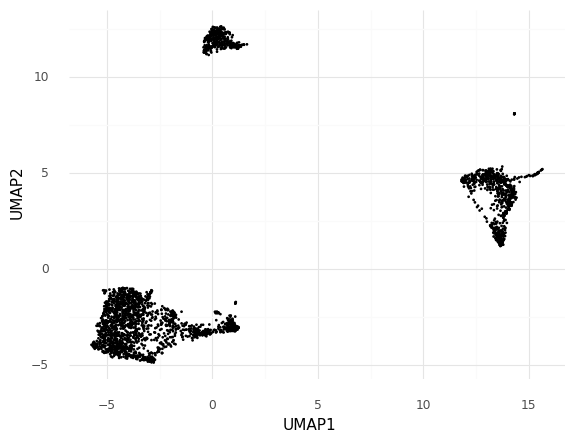

<ggplot: (2932208490617)>

In [29]:
(
    pn.ggplot(pbmc_umap_lab+ 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2'), size=.1) + 
    pn.theme_minimal()
)

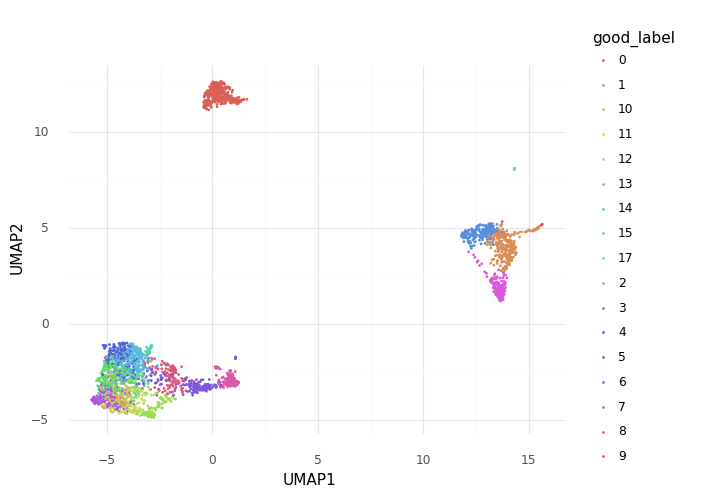

<ggplot: (2932208444968)>

In [31]:
(
    pn.ggplot(pbmc_umap_lab.assign(good_label = lambda x: x.good_label.astype(str)))+ 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2', color = 'good_label'), size=.1) + 
    pn.theme_minimal()
)

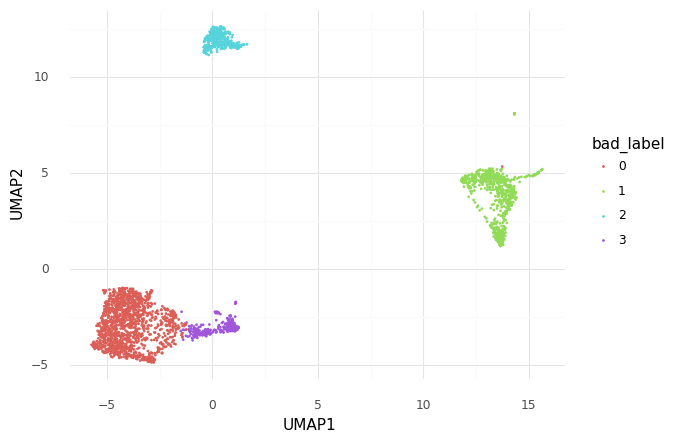

<ggplot: (2932510615324)>

In [32]:
(
    pn.ggplot(pbmc_umap_lab.assign(bad_label = lambda x: x.bad_label.astype(str)))+ 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2', color = 'bad_label'), size=.1) + 
    pn.theme_minimal()
)

In [48]:
pbmc_metrics_sumed = pbmc_metrics.groupby(['raw_exp', 'dataset', 'alg', 'res', 'knn']).agg(avg_stability= ('stability', np.mean), avg_purity = ('purity', np.mean)).reset_index(drop=False).assign(total_avg = lambda x: (x['avg_stability'] + x['avg_purity'])/2 )

In [49]:
pbmc_metrics_sumed.sort_values('total_avg')

,raw_exp,dataset,alg,res,knn,avg_stability,avg_purity,total_avg
369,pbmc-exp_alg-louvain_res-0.7_knn-50_,pbmc,louvain,0.7,50,0.008109,0.189368,0.098739
368,pbmc-exp_alg-louvain_res-0.7_knn-45_,pbmc,louvain,0.7,45,0.009316,0.192414,0.100865
347,pbmc-exp_alg-louvain_res-0.6_knn-35_,pbmc,louvain,0.6,35,0.009658,0.194601,0.102130
391,pbmc-exp_alg-louvain_res-0.8_knn-60_,pbmc,louvain,0.8,60,0.008914,0.195829,0.102371
102,pbmc-exp_alg-leiden_res-0.7_knn-45_,pbmc,leiden,0.7,45,0.008779,0.196584,0.102681
...,...,...,...,...,...,...,...,...
29,pbmc-exp_alg-leiden_res-0.3_knn-5_,pbmc,leiden,0.3,5,0.494085,0.836459,0.665272
124,pbmc-exp_alg-leiden_res-0.8_knn-5_,pbmc,leiden,0.8,5,0.613857,0.717210,0.665534
67,pbmc-exp_alg-leiden_res-0.5_knn-5_,pbmc,leiden,0.5,5,0.579292,0.758235,0.668764
48,pbmc-exp_alg-leiden_res-0.4_knn-5_,pbmc,leiden,0.4,5,0.542190,0.812973,0.677582


In [50]:
pbmc_metrics.query('raw_exp == "pbmc-exp_alg-leiden_res-0.7_knn-5_"')

,cluster_id,stability,purity,raw_exp,dataset,alg,res,knn
0,3,0.731096,0.900421,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
1,5,0.673955,0.791854,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
2,6,0.641475,0.786972,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
3,0,0.606206,0.694820,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
4,1,0.467284,0.914017,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
5,9,0.958302,0.672553,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
6,2,0.543817,0.597214,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5
7,4,0.279791,0.705947,pbmc-exp_alg-leiden_res-0.7_knn-5_,pbmc,leiden,0.7,5


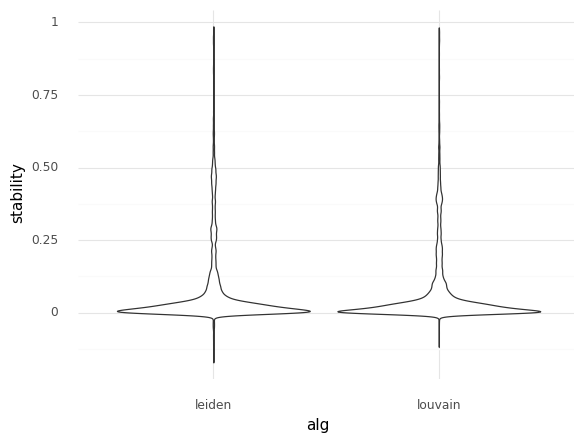

<ggplot: (2932512299560)>

In [52]:
(
    pn.ggplot(all_metric_results) +
    pn.geom_violin(pn.aes(x='alg', y='stability')) + 
    pn.theme_minimal()
)

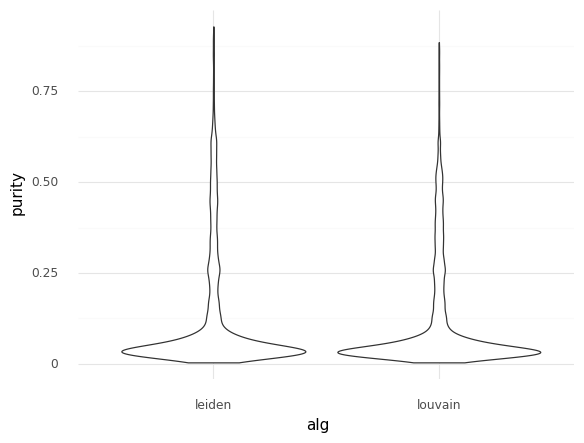

<ggplot: (2932512628306)>

In [53]:
(
    pn.ggplot(all_metric_results) +
    pn.geom_violin(pn.aes(x='alg', y='purity')) + 
    pn.theme_minimal()
)

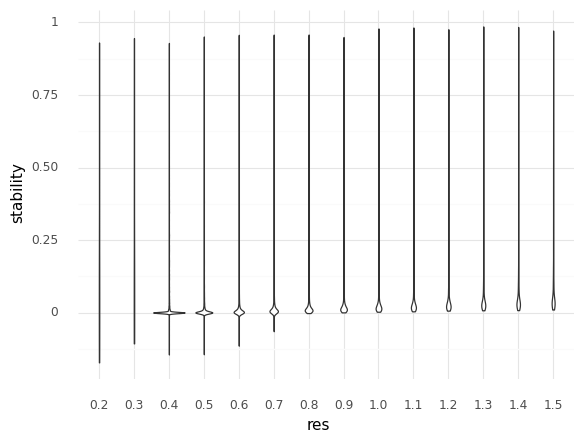

<ggplot: (2932510571316)>

In [54]:
(
    pn.ggplot(all_metric_results) +
    pn.geom_violin(pn.aes(x='res', y='stability')) + 
    pn.theme_minimal()
)

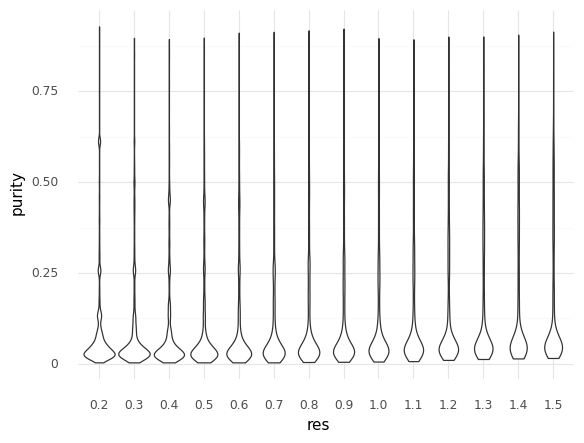

<ggplot: (2932512645482)>

In [55]:
(
    pn.ggplot(all_metric_results) +
    pn.geom_violin(pn.aes(x='res', y='purity')) + 
    pn.theme_minimal()
)

In [61]:
import numpy as np

k= np.asarray([1, 2, 3, None, 4, None, 5])
y = np.asarray([1, 2, 3, -1, 4,-2, 5])
np.where(k != None, k, y)

array([1, 2, 3, -1, 4, -2, 5], dtype=object)

In [62]:
np.random.choice(k, len(k))

array([5, 3, 5, 5, None, None, 3], dtype=object)

In [63]:
np.where(k != None, k, np.random.choice(k, len(k)))

array([1, 2, 3, 4, 4, None, 5], dtype=object)

In [65]:
pbmc_cluster_obj = ce.cluster.ClusterExperiment(pbmc_pca, verbosity=2)

In [66]:
pbmc_cluster_obj.buildNeighborGraph(15, 'l2', 150, False, False, 'median', 3, 1)

ClusterExperiment:DEBUG:Building NN graph


In [73]:
def run_umap_hnsw(X_input, graph, n_components = 2, alpha: float = 1.0,negative_sample_rate: int = 5,
        gamma: float = 1.0, spread = 1.0, min_dist = 0.1,init_pos ='spectral',random_state =1,):

        from umap.umap_ import find_ab_params, simplicial_set_embedding
        import matplotlib.pyplot as plt
        import time 

        a, b = find_ab_params(spread, min_dist)
        print('a,b, spread, dist', a,b,spread, min_dist)
        t0 = time.time()
        X_umap = simplicial_set_embedding(data = X_input, graph=graph, n_components= n_components, initial_alpha= alpha, a = a, b=b, n_epochs=0, metric_kwds={}, gamma=gamma, negative_sample_rate=negative_sample_rate, init=init_pos,  random_state= np.random.RandomState(random_state), metric='euclidean', verbose = 1, densmap=False, densmap_kwds={},output_dens=False)
        return X_umap

In [74]:
run_umap_hnsw(pbmc_cluster_obj.data, pbmc_cluster_obj.nn_graph)

a,b, spread, dist 1.576943460405378 0.8950608781227859 1.0 0.1


AttributeError: 'Graph' object has no attribute 'tocoo'

In [3]:
vanilla_obj = ClusterExperiment_old(data, 1)

NameError: name 'data' is not defined